<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Movies_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starter Code

In [ ]:
pip install faker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker for generating random data
fake = Faker()

random.seed(42)
Faker.seed(42)

# Menu items
movie_items = [
    'Shrek', 'Garfield', 'Inside Out',
    'Shutter Island', 'Now You See Me', 'Karate Kid', 'Matlida', 'Beauty and the Beast',
    'Elemental', 'Up'
]

# Function to generate a random list of items
def generate_random_items():
    return ', '.join(random.sample(movie_items, k=random.randint(1, len(movie_items))))

# Generate random data
data = {
    'User': [random.randint(1, 100) for _ in range(1000)],
    'Items': [generate_random_items() for _ in range(1000)],
    'Date': [fake.date_time_this_decade() for _ in range(1000)],
    'Rating': [round(random.uniform(1.0, 5.0), 1) for _ in range(1000)]
}

# Create DataFrame
movie_recommendations_df = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Checking the DataFrame
movie_recommendations_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Items,Date,Rating
0,82,"Now You See Me, Shrek, Inside Out",2022-11-27 11:08:43.909640,3.3
1,15,"Shrek, Up, Now You See Me, Karate Kid, Garfield",2020-02-11 12:26:36.330179,3.3
2,4,"Garfield, Shrek, Now You See Me, Shutter Islan...",2021-04-01 13:19:56.270807,4.5
3,95,Now You See Me,2021-01-05 12:50:56.811344,3.5
4,36,"Garfield, Up, Matlida, Shutter Island, Shrek, ...",2023-05-07 13:27:10.833370,2.9
5,32,"Up, Now You See Me, Garfield",2023-01-28 08:06:42.188042,3.8
6,29,"Garfield, Elemental, Matlida, Now You See Me",2024-01-21 00:58:00.504570,1.5
7,18,"Up, Shutter Island, Matlida, Elemental, Beauty...",2020-05-24 07:41:42.049531,3.1
8,95,"Shutter Island, Now You See Me, Garfield, Beau...",2021-12-01 09:37:02.198452,3.3
9,14,"Inside Out, Elemental, Garfield, Beauty and th...",2020-02-19 11:08:20.464708,4.4


In [ ]:
# Checking the shape of df
movie_recommendations_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 4)

In [ ]:
# Checking the data types of df
movie_recommendations_df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User               int64
Items             object
Date      datetime64[ns]
Rating           float64
dtype: object

In [ ]:
# Looking for missing values
movie_recommendations_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User      0
Items     0
Date      0
Rating    0
dtype: int64

# Univariate Analysis

In [ ]:
# Quick EDA of df
movie_recommendations_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Date,Rating
count,1000.000000,1000,1000.000000
mean,51.174000,2022-04-30 20:46:30.028456192,3.001500
min,1.000000,2020-01-01 16:10:22.367914,1.000000
25%,28.000000,2021-03-13 23:21:05.379966976,2.000000
50%,52.000000,2022-05-22 00:01:32.876713216,3.000000
75%,76.000000,2023-06-09 11:56:17.353319168,4.000000
max,100.000000,2024-07-17 20:55:30.197936,5.000000
std,28.867197,NaN,1.162411


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


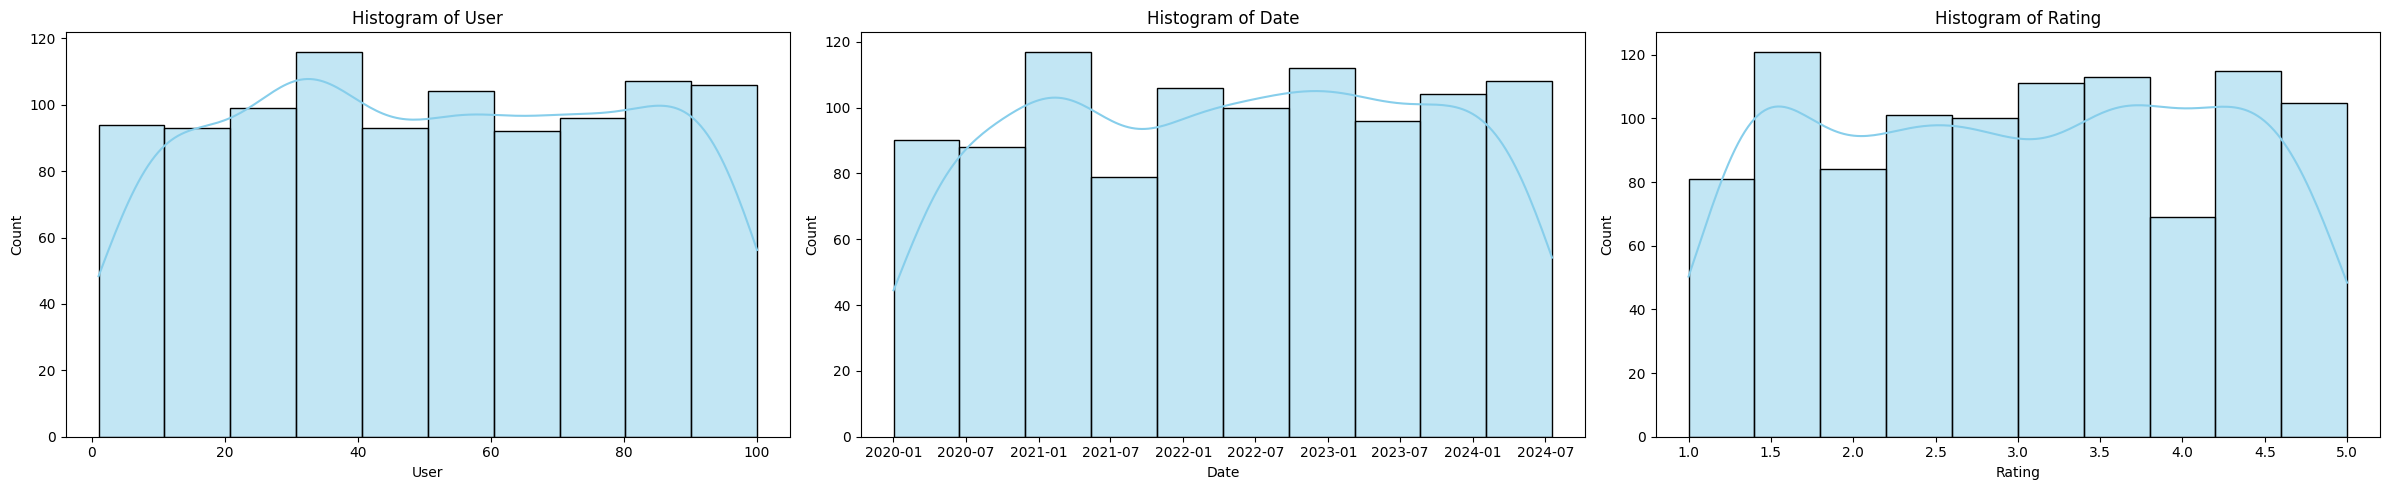

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'items' column from the DataFrame
columns_to_plot = [col for col in movie_recommendations_df.columns if col != 'Items']
num_columns = len(columns_to_plot)

# Set the figure size and create subplots
fig, axes = plt.subplots(1, num_columns, figsize=(8*num_columns, 5))

# Create histograms for each column except 'items'
for i, col in enumerate(columns_to_plot):
    sns.histplot(movie_recommendations_df[col], bins=10, color='skyblue', ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Display the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


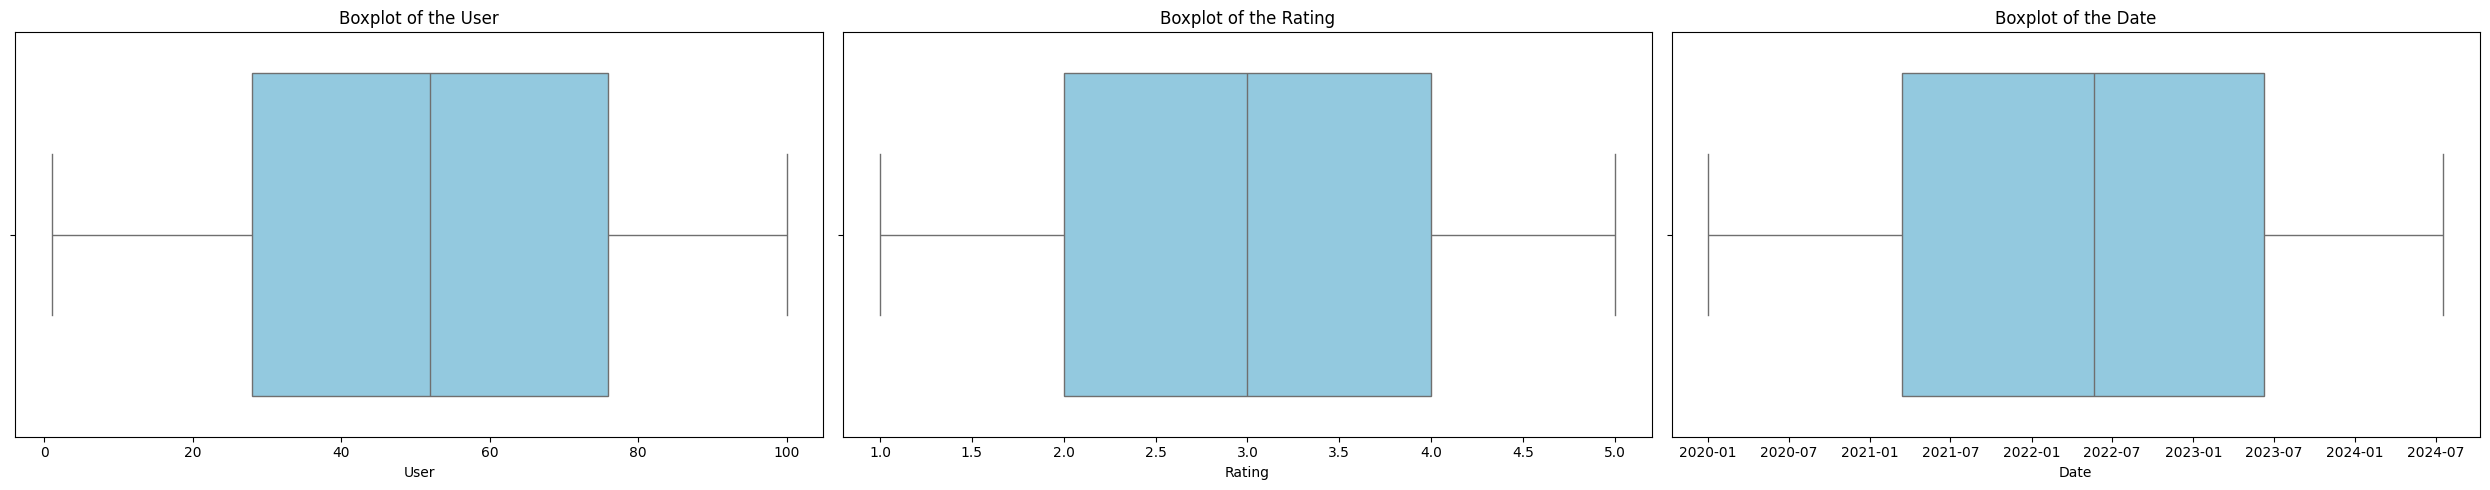

In [ ]:
# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

# Boxplot of the User
sns.boxplot(data=movie_recommendations_df, x='User', color='skyblue', ax=axes[0])
axes[0].set_title('Boxplot of the User')

# Boxplot of the Rating
sns.boxplot(data=movie_recommendations_df, x='Rating', color='skyblue', ax=axes[1])
axes[1].set_title('Boxplot of the Rating')

# Boxplot of the Date
sns.boxplot(data=movie_recommendations_df, x='Date', color='skyblue', ax=axes[2])
axes[2].set_title('Boxplot of the Date')

# Display the plots
plt.tight_layout()
plt.show()

## Analysis of Histograms and Boxplots

Histograms:

Through the histogram of user, we notice that the distribution is slightly left-skewed.

Through the histogram of date, we notice that the distribution is uniform.

Through the histogram of rating, we notice that the distribution is mostly uniform but slightly right-skewed.


Boxplots:

Through all the boxplots of user, rating, and date, we notice that there are no outliers present.

# Bivariate Analysis

## Scatter Plot of User and Rating

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


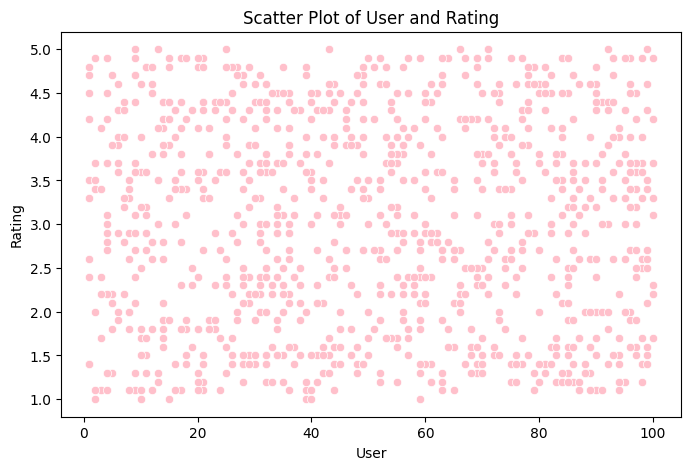

In [ ]:
# Scatter Plot of User and Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=movie_recommendations_df, x='User', y='Rating', color='pink')
plt.title('Scatter Plot of User and Rating')
plt.show()

## Analysis of Scatter Plot of User and Rating

There is no pattern notice as the points are random.

## Seasonality of Rating

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-254-7b9cfd27f3d7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_rating.index, y=monthly_avg_rating.values, palette='viridis')


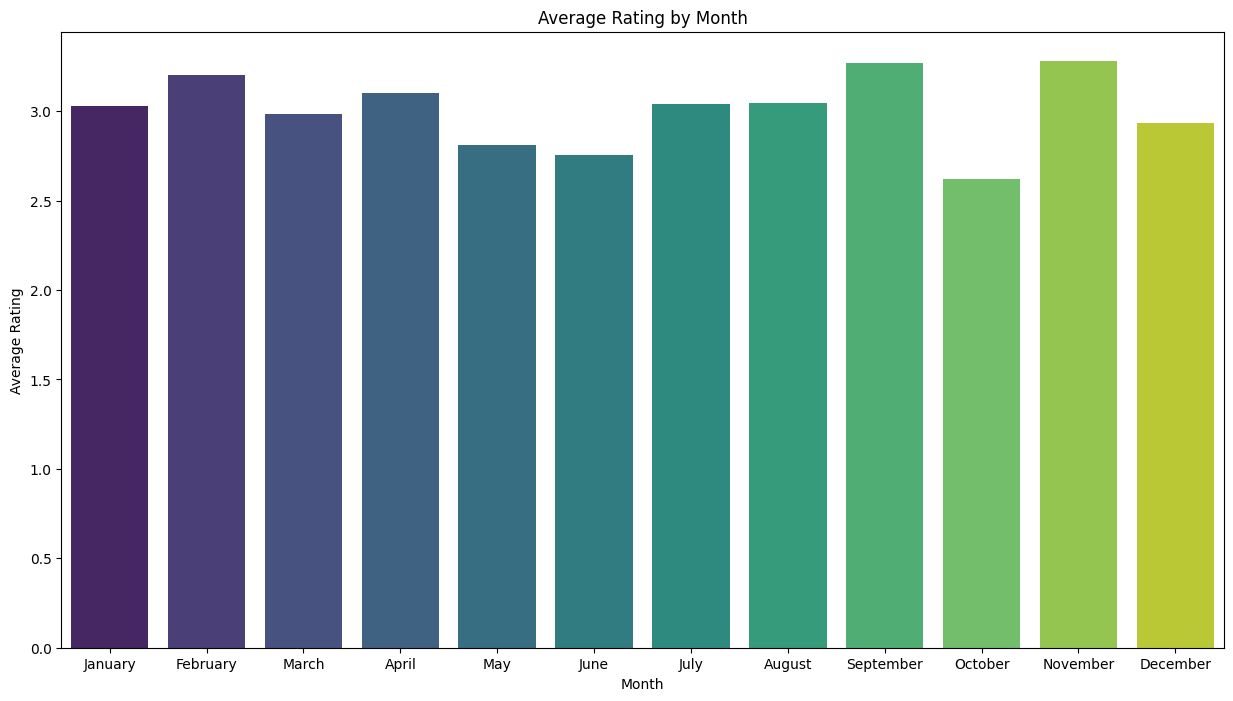

In [ ]:
# Create a copy of the DataFrame
df_copy = movie_recommendations_df.copy()

# Extract the month from the 'Date' column in the copied DataFrame
df_copy['Month'] = df_copy['Date'].dt.month

# Map month numbers to month names in the copied DataFrame
df_copy['Month'] = df_copy['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Calculate the average rating for each month in the copied DataFrame
monthly_avg_rating = df_copy.groupby('Month')['Rating'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=monthly_avg_rating.index, y=monthly_avg_rating.values, palette='viridis')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # No rotation needed for month names
plt.show()


## Analysis of Seasonality of Rating

There is no extreme seasonality noticed, however we can see a drop in rating in October.

## Line Plot of Users Over Time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


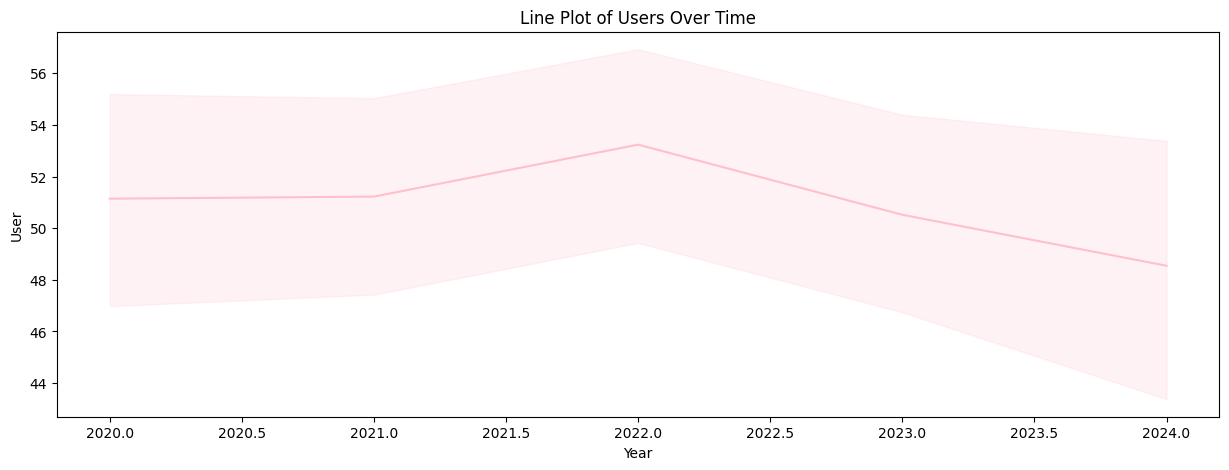

In [ ]:
# Create a new column with just the year extracted from the 'Date' column
movie_recommendations_df['Year'] = movie_recommendations_df['Date'].dt.year

# Line Plot of User and Year
plt.figure(figsize=(15, 5))
sns.lineplot(data=movie_recommendations_df, x='Year', y='User', color='pink')
plt.title('Line Plot of Users Over Time')
plt.show()

## Analysis of Line Plot of Users Over Time

We notice that the trend of users through the years is upward until 2022, but becomes downward after 2022.

## Correlation Matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


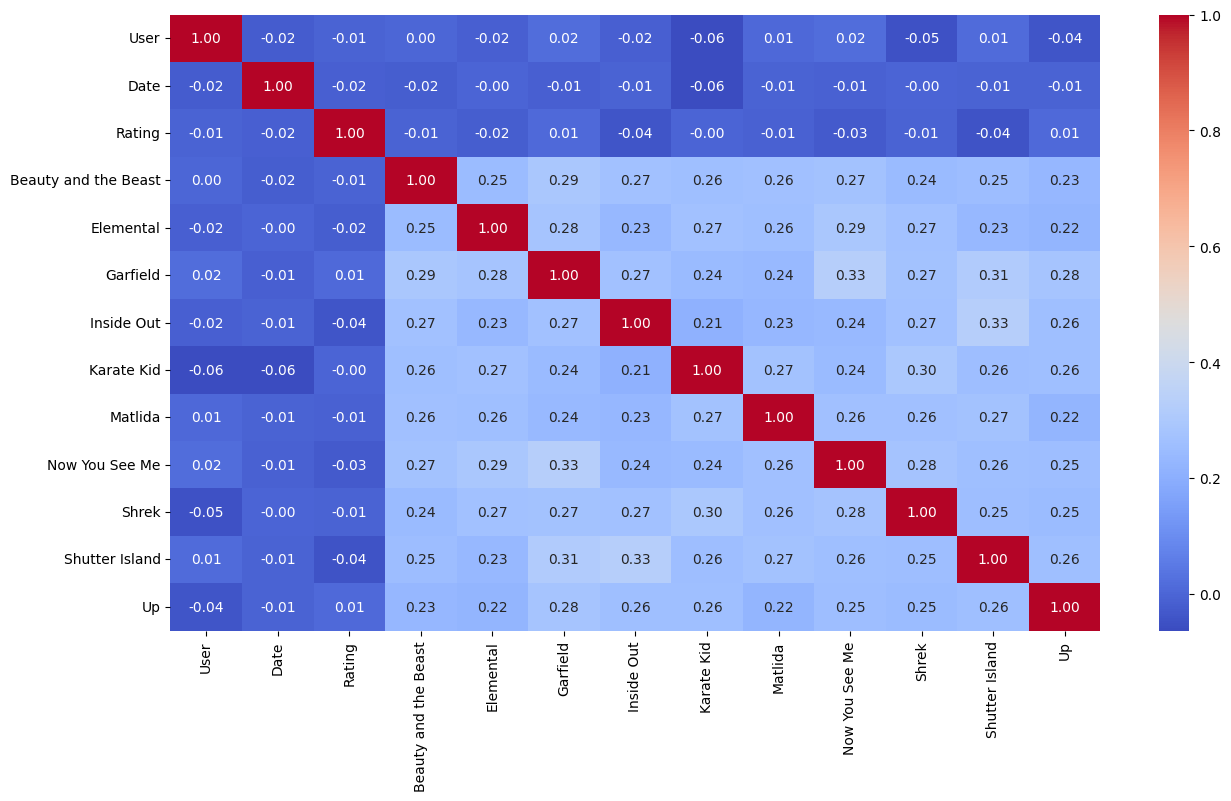

In [ ]:
# Dropping the repeating Year column before making the Correlation Matrix
movie_recommendations_df = movie_recommendations_df.drop(columns=['Year'])

# Split the 'Items' string into a list of movies
movie_recommendations_df['Items'] = movie_recommendations_df['Items'].str.split(', ')

# Explode the 'Items' list into separate rows
exploded_items = movie_recommendations_df.explode('Items')

# Perform one-hot encoding on the exploded items
one_hot_encoded_movies = pd.get_dummies(exploded_items['Items'])

# Group by 'User' and sum the one-hot encoded movies to get binary flags per user
grouped_movies = one_hot_encoded_movies.groupby(exploded_items.index).sum()

# Merge the one-hot encoded movies back with the original dataframe
movie_recommendations_df = movie_recommendations_df.join(grouped_movies)

# Now calculate the correlation matrix including the one-hot encoded movies
correlation_matrix_with_movies = movie_recommendations_df.drop(columns='Items').corr()  # Drop the original 'Items' column

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_with_movies, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Analysis of Correlation Matrix

The highest correlation noticed is between Inside Out and Shutter Island, and Now You See Me and Garfield at 0.33. Suggesting that approximately 33% of users that have watched one of the movies has also watched the other.

The lowest correlation noticed is between Karate Kid and User at -0.06.



# Multivariate Analysis

## Scatter Plot of User Over Time categorized on Rating

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


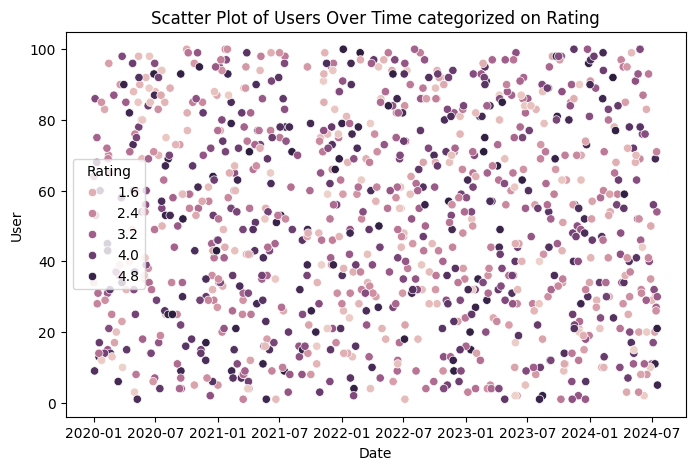

In [ ]:
# Scatter Plot of Users Over Time categorized on Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=movie_recommendations_df, x='Date', y='User', hue='Rating', color='coolwarm')
plt.title('Scatter Plot of Users Over Time categorized on Rating')
plt.show()

## Analysis of Scatter Plot of Users Over Time categorize on Rating


Through this scatter plot, we notice that there is no evident pattern or trend noticed as the colors and points are random.

## Scatter Plot of Ratings by Users categorized by Movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


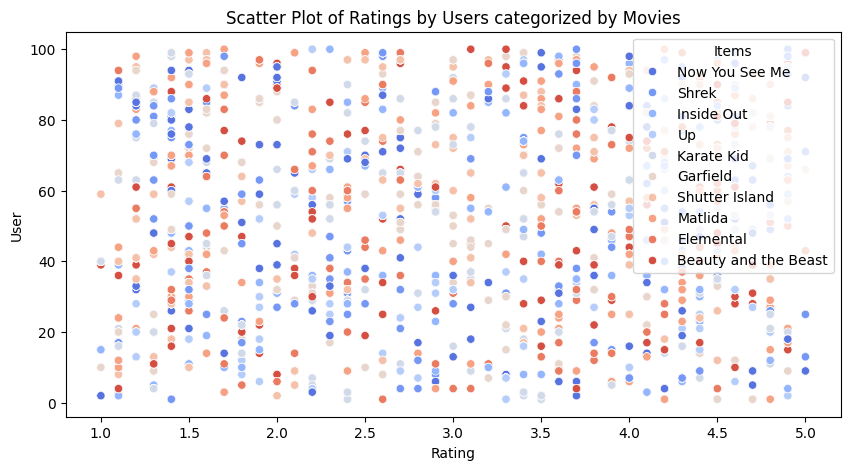

In [ ]:
# Scatter Plot of Ratings by Users categorized by Movies
plt.figure(figsize=(10, 5))
sns.scatterplot(data=movie_recommendations_df, x='Rating', y='User', hue=exploded_items['Items'], palette='coolwarm')
plt.title('Scatter Plot of Ratings by Users categorized by Movies')
plt.show()

## Analysis of Scatter Plot of Ratings by Users categorized by Movies

Through the scatter plot, we notice that there is no evident pattern or trend that can be noticed as all points appear to be random.

# Market Basket Analysis with Apriori Algorithm

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the 'Items' column to a list of lists
transactions = movie_recommendations_df['Items']

# Use TransactionEncoder to one-hot encode the transactions
te = TransactionEncoder()
one_hot_encoded = te.fit(transactions).transform(transactions)

# Create a new DataFrame with the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.03, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Sort rules by lift, confidence, and support
rules = rules.sort_values(['lift', 'confidence', 'support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display frequent itemsets and association rules
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.570,(Beauty and the Beast)
1,0.561,(Elemental)
2,0.550,(Garfield)
3,0.554,(Inside Out)
4,0.576,(Karate Kid)
5,0.560,(Matlida)
6,0.542,(Now You See Me)
7,0.541,(Shrek)
8,0.545,(Shutter Island)
9,0.558,(Up)


In [ ]:
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37052,"(Garfield, Elemental, Matlida, Shrek, Up)","(Now You See Me, Beauty and the Beast, Inside ...",0.176,0.178,0.103,0.585227,3.287794,0.071672,1.981808,0.844472
37111,"(Now You See Me, Beauty and the Beast, Inside ...","(Garfield, Elemental, Matlida, Shrek, Up)",0.178,0.176,0.103,0.578652,3.287794,0.071672,1.955627,0.846526
37088,"(Now You See Me, Beauty and the Beast, Element...","(Garfield, Matlida, Shrek, Up, Karate Kid)",0.174,0.183,0.103,0.591954,3.234721,0.071158,2.002225,0.836385
37075,"(Garfield, Matlida, Shrek, Up, Karate Kid)","(Now You See Me, Beauty and the Beast, Element...",0.183,0.174,0.103,0.562842,3.234721,0.071158,1.889475,0.845599
36886,"(Now You See Me, Beauty and the Beast, Element...","(Matlida, Up, Garfield, Shrek)",0.151,0.211,0.103,0.682119,3.232792,0.071139,2.482062,0.813510
37114,"(Now You See Me, Beauty and the Beast, Shrek, ...","(Garfield, Elemental, Matlida, Inside Out, Up)",0.177,0.183,0.103,0.581921,3.179896,0.070609,1.954176,0.832958
37049,"(Garfield, Elemental, Matlida, Inside Out, Up)","(Now You See Me, Beauty and the Beast, Shrek, ...",0.183,0.177,0.103,0.562842,3.179896,0.070609,1.882612,0.839075
37072,"(Garfield, Matlida, Inside Out, Up, Karate Kid)","(Now You See Me, Beauty and the Beast, Element...",0.188,0.173,0.103,0.547872,3.166892,0.070476,1.829129,0.842651
37091,"(Now You See Me, Beauty and the Beast, Element...","(Garfield, Matlida, Inside Out, Up, Karate Kid)",0.173,0.188,0.103,0.595376,3.166892,0.070476,2.006800,0.827368
37095,"(Now You See Me, Beauty and the Beast, Element...","(Garfield, Matlida, Inside Out, Shrek, Up)",0.179,0.182,0.103,0.575419,3.161643,0.070422,1.926605,0.832776


## Interpretation and Insights for Lift, Leverage, Conviction, and Zhang's Metrix of Top 3 Rules

## Rule 1:

Antecedents: (Garfield, Elemental, Matlida, Shrek, Up)

Consequents: (Now You See Me, Beauty and the Beast, Inside Out)

Support: Support indicates how frequently the rule appears in the dataset. In this case, 10.3% of the transactions include both the antecedents and consequents, showing the rule's prevalence in the dataset.

Confidence: Confidence of 0.59 means that when the antecedents are present in a transaction, there is a 58.5% chance that the consequents will also be present. Confidence measures the reliability of the inference made by the rule.

Lift: Since the lift for Rule 1 is 3.29, this suggest that if the antecedents exists, it also more likely for consequent to also exist.


Leverage: Since the leverage is close to zero at 0.07, it can be assumed that there is no association.

Conviction: As the conviction is 1.98, it can be noticed that the consequents are significantly dependent on the antecendents.

Zhang's Metric: As the zhang's metric is 0.84, there is a positive association noticed.


## Rule 2:

Antecedents: (Now You See Me, Beauty and the Beast, Inside Out)

Consequents: (Garfield, Elemental, Matlida, Shrek, Up)

Support: The support of 0.103 means that 10.3% of all transactions in the dataset contain both the antecedents and the consequents.

Confidence:  Confidence of 0.58 means that when the antecedents are present in a transaction, there is a 57.9% chance that the consequents will also be present.

Lift: Since the lift for Rule 2 is 3.29, this suggest that if the antecedents exists, it also more likely for consequent to also exist. The similar results for Rule 1 and Rule 2 are reasonable considering the only difference between them is the fact that the antecedents and consequents were switched.


Leverage: Since the leverage is close to zero at 0.07, it can be assumed that there is no association.

Conviction: As the conviction is 1.96, it can be noticed that the consequents are significantly dependent on the antecendents.

Zhang's Metric: As the zhang's metric is 0.85, there is a positive association noticed.


## Rule 3:

Antecedents: (Now You See Me, Beauty and the Beast, Elemental)

Consequents: (Garfield, Matlida, Shrek, Up, Karate Kid)

Support: The support of 0.103 means that 10.3% of all transactions in the dataset contain both the antecedents and the consequents.

Confidence: Confidence of 0.59 means that when the antecedents are present in a transaction, there is a 59.2% chance that the consequents will also be present.

Lift: Since the lift for Rule 3 is 3.23, this suggest that if the antecedents exists, it also more likely for consequent to also exist.


Leverage: Since the leverage is close to zero at 0.07, it can be assumed that there is no association.

Conviction: As the conviction is 2.0, it can be noticed that the consequents are significantly dependent on the antecendents.

Zhang's Metric: As the zhang's metric is 0.84, there is a positive association noticed.